In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
# Exemplo de dados hipotético com duas distribuições gaussianas
np.random.seed(42)
data1 = np.random.normal(loc=160, scale=5, size=100)
data2 = np.random.normal(loc=180, scale=6, size=150)
data = np.concatenate([data1, data2])

In [3]:
data

array([162.48357077, 159.30867849, 163.23844269, 167.61514928,
       158.82923313, 158.82931522, 167.89606408, 163.83717365,
       157.65262807, 162.71280022, 157.68291154, 157.67135123,
       161.20981136, 150.43359878, 151.37541084, 157.18856235,
       154.9358444 , 161.57123666, 155.45987962, 152.93848149,
       167.32824384, 158.8711185 , 160.33764102, 152.87625907,
       157.27808638, 160.55461295, 154.24503211, 161.87849009,
       156.99680655, 158.54153125, 156.99146694, 169.26139092,
       159.93251388, 154.71144536, 164.11272456, 153.89578175,
       161.04431798, 150.20164938, 153.35906976, 160.98430618,
       163.6923329 , 160.85684141, 159.42175859, 158.49448152,
       152.60739005, 156.40077896, 157.69680615, 165.28561113,
       161.71809145, 151.18479922, 161.62041985, 158.0745886 ,
       156.61539   , 163.05838144, 165.15499761, 164.6564006 ,
       155.80391238, 158.45393812, 161.65631716, 164.87772564,
       157.60412881, 159.07170512, 154.46832513, 154.01

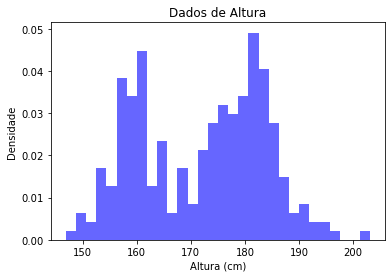

In [4]:
# Visualizando os dados
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Dados de Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.show()

In [5]:
# Aplicando a mistura gaussiana
n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data.reshape(-1, 1))  # É necessário remodelar os dados para o formato (n_samples, n_features)

# Obtendo os parâmetros do modelo ajustado
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8e2466edc0>
Traceback (most recent call last):
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modul

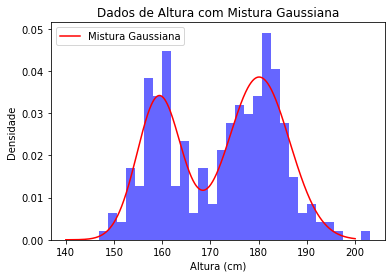

Componente 1:
Média: 180.09, Desvio Padrão: 6.32, Peso: 0.61
Componente 2:
Média: 159.36, Desvio Padrão: 4.56, Peso: 0.39


In [6]:
# Visualizando as distribuições ajustadas
x = np.linspace(140, 200, 1000).reshape(-1, 1)
pdf = np.exp(gmm.score_samples(x))  # Obtendo a função de densidade de probabilidade
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue')
plt.plot(x, pdf, '-r', label='Mistura Gaussiana')
plt.title('Dados de Altura com Mistura Gaussiana')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Imprimindo os parâmetros das componentes
for i in range(n_components):
    print(f"Componente {i + 1}:")
    print(f"Média: {means[i][0]:.2f}, Desvio Padrão: {np.sqrt(covariances[i][0][0]):.2f}, Peso: {weights[i]:.2f}")